In [1]:
import torch
import numpy as np
import math
import matplotlib.pyplot as plt
import IPython.display as ipd
import soundfile as sf

## Load Audio File

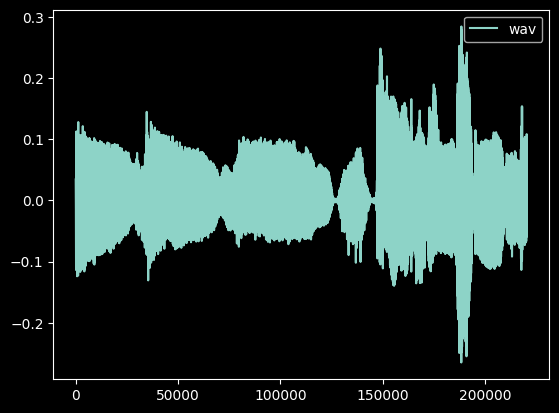

In [2]:
AUDIO_PATH = './test.wav'
wav, sr = sf.read(AUDIO_PATH)

ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.legend()

## Multiband Widener

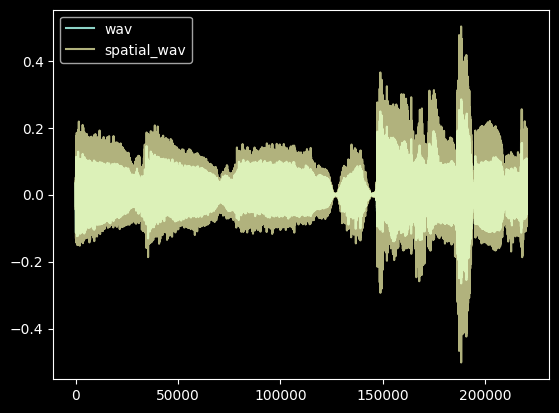

In [4]:
from diffFx_pytorch.processors.spatial  import MultiBandStereoWidener  
SPATIAL_DSP_PARAMS = {
    'band0_width': 0.3,
    'band1_width': 0.2,
    'band2_width': 0.1,
    'crossover0_freq': 100.0,
    'crossover1_freq': 2000.0
}

Processor = MultiBandStereoWidener(sample_rate=sr).to('cuda')
test_wav = torch.from_numpy(wav).unsqueeze(0).unsqueeze(0).float().to('cuda')
test_wav = test_wav.repeat(1, 2, 1)
spatial_wav = Processor(test_wav, None, SPATIAL_DSP_PARAMS)

ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
ipd.display(ipd.Audio(data=spatial_wav.squeeze().cpu().numpy(), rate=sr, normalize=False))

plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.plot(spatial_wav.squeeze()[0, ...].cpu().numpy(),  alpha=0.7,label='spatial_wav')
plt.legend()